In [1]:
import geopandas as gpd
import pandas as pd
import os
from tqdm import tqdm
from shapely.geometry import Point,box
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

def df_to_shapefile(df, output_path,lon='lon',lat='lat', epsg=4326, batch_size=10000):
    '''将 DataFrame 转换为 shapefile'''
    # 初始化一个空的 GeoDataFrame，并设置几何列
    combined_geo_df = gpd.GeoDataFrame(columns=df.columns.tolist() + ['geometry'])
    combined_geo_df.set_geometry('geometry', inplace=True)
    combined_geo_df.set_crs(epsg=epsg, inplace=True)

    total_batches = len(df) // batch_size + (1 if len(df) % batch_size != 0 else 0)
    df_iterator = (df.iloc[i:i + batch_size] for i in range(0, len(df), batch_size))
    
    for batch_df in tqdm(df_iterator, total=total_batches, desc="Processing batches"):
        geometry = [Point(xy) for xy in zip(batch_df[lon], batch_df[lat])]
        batch_geo_df = gpd.GeoDataFrame(batch_df, geometry=geometry)
        batch_geo_df.set_crs(epsg=epsg, inplace=True)
        combined_geo_df = pd.concat([combined_geo_df, batch_geo_df], ignore_index=True)
    
    combined_geo_df.to_file(output_path, driver='ESRI Shapefile')

In [49]:
os.chdir(r'E:\SETP_ICESat-2')
SETP_SHP = r"E:\SETP_Boundary.geojson"

ATL03_Water = pd.read_hdf("ATL_03_GlobalGeolocatedPhoton\ATL03_ALL\ATL03_Water.h5", key='df') # ATL03_ALL.h5
ATL03_ALL = pd.read_hdf("ATL_03_GlobalGeolocatedPhoton\ATL03_ALL\ATL03_ALL.h5", key='df') 

ATL06_ALL = pd.read_hdf("ATL_06_Landice\ATL06_ALL\ATL06_ALL.h5", key='df')
ATL08_ALL = pd.read_hdf("ATL_08_LandVegetation\ATL08_ALL\ATL08_ALL.h5", key='df')
ATL13_ALL = pd.read_hdf("ATL_13_InlandSurfaceWaterData\ATL13_ALL\ATL13_ALL.h5", key='df')

# df_to_shapefile(ATL03_ALL,'ATL03_ALL.shp')
# Sample = SETP_H5[(SETP_H5.Sort==10157) & (SETP_H5.subgroup=='gt1l/')]
# print('包含的冰湖唯一代码={}'.format(ATL03_ALL['Sort'].unique()))

In [65]:
ATL13_ALL[ATL13_ALL['Sort'] == 1200]

,time,date,lat,lon,segment_lat,segment_lon,height_surface,water_depth,dem,id,cloud,ice_flag,inland_water_body_type,subgroup,Sort,Area_pre
150,1.727554e+08,2023-06-23,29.441924,93.716065,29.441926,93.716065,4380.468750,1.879504,4381.897949,838562,4,127,1,gt3l/,1200.0,0.142428
151,1.727554e+08,2023-06-23,29.441881,93.716060,29.441880,93.716060,4380.474609,1.879504,4381.897949,838562,4,127,1,gt3l/,1200.0,0.142428
152,1.727554e+08,2023-06-23,29.441835,93.716055,29.441835,93.716055,4380.452637,1.879504,4381.897949,838562,4,127,1,gt3l/,1200.0,0.142428
153,1.727554e+08,2023-06-23,29.441787,93.716050,29.441790,93.716050,4380.466797,1.879504,4381.897949,838562,4,127,1,gt3l/,1200.0,0.142428
154,1.727554e+08,2023-06-23,29.441740,93.716045,29.441739,93.716045,4380.466309,1.879504,4381.927734,838563,4,127,1,gt3l/,1200.0,0.142428
155,1.727554e+08,2023-06-23,29.441691,93.716039,29.441694,93.716040,4380.442383,1.879504,4381.927734,838563,4,127,1,gt3l/,1200.0,0.142428
156,1.727554e+08,2023-06-23,29.441639,93.716034,29.441636,93.716033,4380.449219,1.879504,4381.927734,838563,4,127,1,gt3l/,1200.0,0.142428
157,1.727554e+08,2023-06-23,29.441590,93.716028,29.441591,93.716028,4380.437500,1.879504,4381.919434,838563,4,127,1,gt3l/,1200.0,0.142428
158,1.727554e+08,2023-06-23,29.441538,93.716022,29.441540,93.716023,4380.457031,1.879504,4381.919434,838564,4,127,1,gt3l/,1200.0,0.142428
159,1.727554e+08,2023-06-23,29.441482,93.716016,29.441482,93.716016,4380.458008,1.879504,4381.919434,838564,4,127,1,gt3l/,1200.0,0.142428


In [77]:
print(ATL13_ALL['Sort'].unique())
ATL13_ALL[ATL13_ALL['Sort'] == 2389]

[ 213. 1497. 1200. 1197. 6392. 1878. 1701. 5500. 2389.  805. 5786.]


,time,date,lat,lon,segment_lat,segment_lon,height_surface,water_depth,dem,id,cloud,ice_flag,inland_water_body_type,subgroup,Sort,Area_pre
0,1.771945e+08,2023-08-13,28.053031,98.497531,28.053029,98.497532,3865.910889,14.897931,3875.217773,155538,0,127,1,gt2l/,2389.0,0.406669
1,1.771945e+08,2023-08-13,28.053187,98.497514,28.053188,98.497515,3865.887207,14.897931,3875.304199,155539,0,127,1,gt2l/,2389.0,0.406669
2,1.771945e+08,2023-08-13,28.053304,98.497501,28.053302,98.497502,3865.883545,14.897931,3875.304199,155540,0,127,1,gt2l/,2389.0,0.406669
3,1.771945e+08,2023-08-13,28.053407,98.497489,28.053404,98.497491,3865.868896,14.897931,3875.545654,155541,0,127,1,gt2l/,2389.0,0.406669
4,1.771945e+08,2023-08-13,28.053541,98.497475,28.053544,98.497475,3865.894775,14.897931,3875.943848,155541,0,127,1,gt2l/,2389.0,0.406669
5,1.771945e+08,2023-08-13,28.053709,98.497456,28.053710,98.497457,3865.895020,14.897931,3876.381592,155542,0,127,1,gt2l/,2389.0,0.406669
6,1.771945e+08,2023-08-13,28.053873,98.497438,28.053875,98.497439,3865.913086,14.897931,3876.381592,155543,0,127,1,gt2l/,2389.0,0.406669
7,1.771945e+08,2023-08-13,28.054001,98.497424,28.054003,98.497425,3865.871338,14.897931,3876.707031,155544,0,127,1,gt2l/,2389.0,0.406669
8,1.771945e+08,2023-08-13,28.054111,98.497412,28.054111,98.497413,3865.883301,14.897931,3876.880371,155544,0,127,1,gt2l/,2389.0,0.406669
9,1.771945e+08,2023-08-13,28.054184,98.497404,28.054182,98.497405,3865.878662,14.897931,3876.880371,155545,0,127,1,gt2l/,2389.0,0.406669


In [82]:
ATL08_ALL[ATL08_ALL['Sort'] == 2389]

,time,date,lat,lon,height_centroid,height_canopy,dem,id,cloud,subgroup,Sort,Area_pre
0,1.731853e+08,2023-06-28,28.056488,98.495049,3.402823e+38,3.402823e+38,3878.604248,846249,1,gt3l/,2389.0,0.406669
1,1.731853e+08,2023-06-28,28.055408,98.494926,3.402823e+38,3.402823e+38,3875.167236,846254,1,gt3l/,2389.0,0.406669
0,1.771945e+08,2023-08-13,28.051994,98.497643,3.402823e+38,3.402823e+38,3874.531250,155531,1,gt2l/,2389.0,0.406669
1,1.771945e+08,2023-08-13,28.052895,98.497551,3.402823e+38,3.402823e+38,3875.246826,155536,2,gt2l/,2389.0,0.406669
2,1.771945e+08,2023-08-13,28.053795,98.497444,3.402823e+38,3.402823e+38,3876.381592,155541,2,gt2l/,2389.0,0.406669
3,1.771945e+08,2023-08-13,28.054695,98.497345,3.402823e+38,3.402823e+38,3877.194336,155546,2,gt2l/,2389.0,0.406669
11,1.771945e+08,2023-08-13,28.052250,98.498505,3.402823e+38,3.402823e+38,3874.662354,155532,1,gt2r/,2389.0,0.406669
12,1.771945e+08,2023-08-13,28.053150,98.498405,3.402823e+38,3.402823e+38,3875.040039,155537,1,gt2r/,2389.0,0.406669


In [79]:
print(ATL03_Water.Sort.unique())
ATL03_Water[ATL03_Water.Sort == 2389]

[1.6650e+03 1.6640e+03 7.6640e+03 7.6700e+03 7.6720e+03 7.6650e+03
 7.7140e+03 2.8170e+03 8.4050e+03 3.0890e+03 9.8200e+02 9.7500e+02
 5.1470e+03 7.5000e+02 7.2100e+02 7.2000e+02 4.0600e+03 3.6450e+03
 3.0070e+03 1.8650e+03 5.0880e+03 3.1100e+02 1.8780e+03 9.8680e+03
 9.8660e+03 9.8620e+03 9.8610e+03 2.9380e+03 4.4010e+03 2.2950e+03
 2.2880e+03 2.6720e+03 8.9200e+02 8.6100e+02 2.6710e+03 2.2530e+03
 8.7100e+02 6.7940e+03 2.0530e+03 2.0630e+03 4.4600e+02 3.9160e+03
 4.3340e+03 1.0377e+04 9.1090e+03 1.7010e+03 5.3930e+03 1.6970e+03
 5.3330e+03 1.7070e+03 4.6320e+03 1.7050e+03 5.3850e+03 4.6290e+03
 1.6580e+03 5.3880e+03 5.8520e+03 3.3720e+03 6.1960e+03 8.8030e+03
 6.0600e+02 2.5860e+03 8.7730e+03 1.5620e+03 5.5000e+03 3.4580e+03
 1.2930e+03 1.3040e+03 1.0000e+01 3.5130e+03 4.1930e+03 1.3240e+03
 1.5350e+03 4.4220e+03 2.5230e+03 8.7250e+03 2.5500e+03 1.6820e+03
 5.4530e+03 1.6960e+03 5.4500e+03 4.5630e+03 1.6990e+03 3.2010e+03
 9.4210e+03 9.4220e+03 9.5700e+02 2.9110e+03 8.8330e+03 1.0754

,time,date,lat,lon,height,dist_ph_along,quality_ph,signal_conf_combined,signal_conf_ph_Water,subgroup,Sort,Area_pre
271,1.771945e+08,2023-08-13,28.051472,98.497700,3865.805908,11.971239,0,"[4, -1, -1, 4, 4]",True,gt2l/,2389.0,0.406669
272,1.771945e+08,2023-08-13,28.051472,98.497700,3865.965332,11.970863,0,"[4, -1, -1, 4, 4]",True,gt2l/,2389.0,0.406669
273,1.771945e+08,2023-08-13,28.051478,98.497699,3866.043457,12.685816,0,"[4, -1, -1, 4, 4]",True,gt2l/,2389.0,0.406669
274,1.771945e+08,2023-08-13,28.051478,98.497699,3866.019287,12.686187,0,"[4, -1, -1, 4, 4]",True,gt2l/,2389.0,0.406669
275,1.771945e+08,2023-08-13,28.051484,98.497699,3865.882812,13.401893,0,"[4, -1, -1, 4, 4]",True,gt2l/,2389.0,0.406669
...,...,...,...,...,...,...,...,...,...,...,...,...
5601,1.731853e+08,2023-06-28,28.048327,98.494145,3867.620361,16.325270,0,"[2, -1, -1, 1, 2]",True,gt3l/,2389.0,0.406669
5623,1.731853e+08,2023-06-28,28.048308,98.494143,3867.538330,18.450829,0,"[2, -1, -1, 1, 2]",True,gt3l/,2389.0,0.406669
5703,1.731853e+08,2023-06-28,28.048257,98.494137,3866.038574,4.068319,0,"[2, -1, -1, 2, 2]",True,gt3l/,2389.0,0.406669
5750,1.731853e+08,2023-06-28,28.048225,98.494133,3866.136475,7.608379,0,"[2, -1, -1, 2, 2]",True,gt3l/,2389.0,0.406669


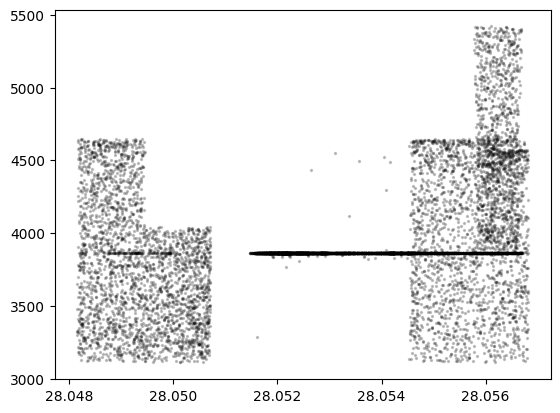

In [81]:
test = ATL03_ALL[ATL03_ALL['Sort'] == 2389]

plt.scatter(test.lat, test.height, s=2, color='black', alpha=0.2, label='ATL03')
plt.show()

In [18]:
import matplotlib.pyplot as plt
import traceback
import numpy as np
Sample = Sample.copy()
Sample.rename(columns={'height': 'h'}, inplace=True)
class dataCollector:
    def __init__(self, datatype=[],dataDF_list=[]):
        if 'ATL_03' in datatype:
            self.atl03 = dataDF_list[datatype.index('ATL_03')]
        if 'ATL_06' in datatype:
            self.atl06 = dataDF_list[datatype.index('ATL_06')]
        if 'ATL_07' in datatype:
            self.atl07 = dataDF_list[datatype.index('ATL_07')]
        if 'ATL_08' in datatype:
            self.atl08 = dataDF_list[datatype.index('ATL_08')]
        if 'ATL_10' in datatype:
            self.atl10 = dataDF_list[datatype.index('ATL_10')]
        if 'ATL_12' in datatype:
            self.atl12 = dataDF_list[datatype.index('ATL_12')]
        if 'ATL_13' in datatype:
            self.atl13 = dataDF_list[datatype.index('ATL_13')]

    def plotData(self,ax=None,title='some cool ICESat-2 data I found on OpenAltimetry', closefig=True):

        try:
            
            # get data if not already there
            if 'atl03' not in vars(self).keys(): 
                print('Data has not yet been requested from OpenAltimetry yet. Doing this now.')
                self.requestData(verbose=True)

            axes_not_specified = True if ax == None else False

            # create the figure and axis
            if axes_not_specified:
                fig, ax = plt.subplots(figsize=[8,5])
                
            if 'atl03' in vars(self).keys():
                if len(self.atl03) > 0:
                    atl03 = ax.scatter(self.atl03.lat, self.atl03.h, s=2, color='black', alpha=0.2, label='ATL03')
            if 'atl06' in vars(self).keys():
                if len(self.atl06) > 0:
                    atl06, = ax.plot(self.atl06.lat, self.atl06.h, c='C0', linestyle='-', label='ATL06')
            if 'atl07' in vars(self).keys(): 
                if len(self.atl07) > 0:
                    atl07, = ax.plot(self.atl07.lat, self.atl07.h, c='C2', linestyle='--', label='ATL07')
            if 'atl08' in vars(self).keys():
                if len(self.atl08) > 0:
                    atl08, = ax.plot(self.atl08.lat, self.atl08.h, c='C1', linestyle=':', label='ATL08')
                    try:
                        if np.sum(~np.isnan(self.atl08.canopy))>0:
                            atl08canopy = ax.scatter(self.atl08.lat, self.atl08.h+self.atl08.canopy, s=5, c='C1', label='ATL08 canopy')
                    except: 
                        print('could not display ATL08 canopy data')
            if 'atl10' in vars(self).keys():
                if len(self.atl10) > 0:
                    atl10, = ax.plot(self.atl10.lat, self.atl10.h, c='C3', linestyle='-', label='ATL10')
            if 'atl12' in vars(self).keys():   
                if len(self.atl12) > 0:
                    atl12, = ax.plot(self.atl12.lat, self.atl12.h, c='C4', linestyle='--', label='ATL12')
            if 'atl13' in vars(self).keys():
                if len(self.atl13) > 0:
                    atl13, = ax.plot(self.atl13.lat, self.atl13.h, c='C5', linestyle=':', label='ATL13')

            try:
                prodlist = [v for v in vars(self).keys() if (('atl' in v) & (len(v)==5) & ('atl03' not in v))]
                maxs = [vars(self)[k].h.max() for k in prodlist]
                mins = [vars(self)[k].h.min() for k in prodlist]
                maxprods = np.nanmax(maxs)
                minprods = np.nanmin(mins)
                hrange = maxprods - minprods
                y_min = minprods - hrange * 0.5
                y_max = maxprods + hrange * 0.5
                ax.set_ylim((y_min, y_max))
            except:
                heights = self.atl03.h[self.atl03.conf != 'Noise']
                y_min = np.min(heights)
                y_max = np.max(heights)
                ax.set_ylim((y_min, y_max))

            x_min = self.atl03.lat.min()
            x_max = self.atl03.lat.max()
            ax.set_xlim((x_min, x_max))

            # label the axes
            ax.set_title(title)
            ax.set_xlabel('latitude')
            ax.set_ylabel('elevation in meters')

            # add a legend
            ax.legend(loc='upper right')

            # add some text to provide info on what is plotted
            info = 'ICESat-2 track {track:d}-{beam:s} on {date:s} ({lon:.4f}E, {lat:.4f}N)'.format(track=self.track, 
                                                                                                    beam=self.beam, 
                                                                                                    date=self.date, 
                                                                                                    lon=np.mean(self.lonlims), 
                                                                                                    lat=np.mean(self.latlims))
            infotext = ax.text(0.02, 0.97, info,
                                horizontalalignment='left', 
                                verticalalignment='top', 
                                transform=ax.transAxes,
                                fontsize=7,
                                bbox=dict(edgecolor=None, facecolor='white', alpha=0.9, linewidth=0))

            if axes_not_specified:
                fig.tight_layout()
                if closefig:
                    plt.close(fig)
                return fig
            else:
                return ax
                
        except:
            print('Plotting the ICESat-2 data was unsuccessful.')
            traceback.print_exc()

In [ ]:
s = dataCollector(datatype=['ATL_03'],dataDF_list=[Sample])
s.plotData()